In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [5]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
print(df.shape)

(100, 6)


In [6]:
df.head()

,col1,col2,col3,col4,col5,target
0,2.679690,-0.334668,1.389276,-2.131587,-2.392387,0
1,1.235322,1.728628,-1.326370,0.677558,0.199486,0
2,-1.072853,-0.079060,-0.631128,-0.445772,1.157573,1
3,-0.778380,-2.409606,3.063435,-3.065049,0.300152,0
4,2.037265,-1.773936,-0.842966,-1.596642,0.980695,1


In [12]:
# func fo rrow sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)


In [13]:
# funct for column sampling 
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[: ,-1],int(percent*df.shape[1]))
    return df[cols]

In [14]:
# funct for combines sampling 
def combined_sampling(df,row_percent,col_percent):
    new_df=sample_rows(df,row_percent)
    return saple_features(new_df,col_percent)

In [20]:
# checking row_sampling function making 3 
# dataset  for model me pass karne ke liye
df1=sample_rows(df,0.1)
df2=sample_rows(df,0.1)
df3=sample_rows(df,0.1)


In [24]:
df1.head()

,col1,col2,col3,col4,col5,target
60,1.956727,-1.287388,-1.003086,-1.950397,1.083625,1
6,2.161792,1.375283,-1.674218,0.747595,-1.859387,0
76,0.599816,-2.873299,0.385241,0.759335,1.201499,1
68,0.832613,0.005656,-1.519081,-1.021646,2.240759,1
52,2.099512,1.708905,-0.308458,-0.440398,-0.324046,0


In [27]:
# making three object of decision tree for bagging 
from sklearn.tree import DecisionTreeClassifier , plot_tree
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

[Text(0.5, 0.75, 'x[1] <= 0.705\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

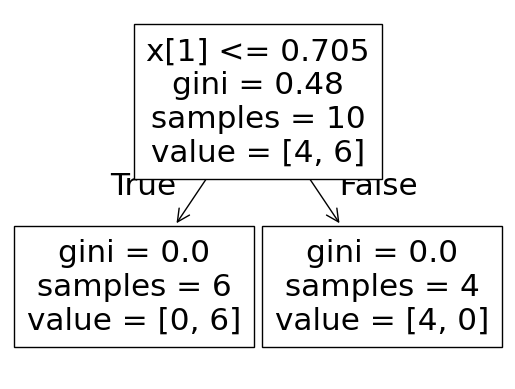

In [31]:
plot_tree(clf1)